In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
weights = np.array([
    [0.7, 0.9, 0.2, 0.1, 0.3],  # Cluster 0
    [0.3, 0.1, 0.2, 0.7, 0.8]   # Cluster 1
])

In [11]:
# Learning rate schedule
eta = 0.8
cycles = 4
history = [weights.copy()]

In [ ]:
print("Enter 4 input vectors, 5 values each (space-separated):")
inputs = []
for i in range(4):
    while True:
        try:
            vec = list(map(float, input(f"Vector {i+1}: ").strip().split()))
            if len(vec) != 5:
                raise ValueError
            inputs.append(vec)
            break
        except:
            print("Invalid input. Please enter 5 space-separated numbers.")
inputs = np.array(inputs)

Enter 4 input vectors, 5 values each (space-separated):
Vector 1: 0 1 1 1 
Invalid input. Please enter 5 space-separated numbers.
Vector 1: 1 0 0 1 1 1
Invalid input. Please enter 5 space-separated numbers.
Vector 1: 1 0 0 1 1
Vector 2: 0 0 0 1 1
Vector 3: 1 1 1 0 0
Vector 4: 1 0 0 0 1 


In [13]:
for epoch in range(cycles):
    print(f"\n📘 Epoch {epoch + 1}, Learning Rate η = {eta}")
    for idx, x in enumerate(inputs):
        # Calculate Euclidean distance to each cluster
        distances = np.linalg.norm(weights - x, axis=1)
        print(f"Input {idx+1}: {x}")
        print(f"Distances: Cluster 0 = {distances[0]:.4f}, Cluster 1 = {distances[1]:.4f}")
        # Update weights of the winning cluster
        winner = np.argmin(distances)
        print(f"Winner: Cluster {winner}")
        weights[winner] += eta * (x - weights[winner])
        print(f"Input {idx+1} assigned to Cluster {winner}. Updated Weights:")
        print(f"Cluster 0: {weights[0]}")
        print(f"Cluster 1: {weights[1]}")

    eta /= 2  # decay learning rate
    history.append(weights.copy())


📘 Epoch 1, Learning Rate η = 0.05
Input 1: [1. 0. 0. 1. 1.]
Distances: Cluster 0 = 1.9952, Cluster 1 = 0.5542
Winner: Cluster 1
Input 1 assigned to Cluster 1. Updated Weights:
Cluster 0: [9.97760512e-01 9.99253504e-01 9.94028032e-01 7.46496000e-04
 2.23948800e-03]
Cluster 1: [7.06147296e-01 3.95190103e-08 7.90380207e-08 5.63101644e-01
 9.99999921e-01]
Input 2: [0. 0. 0. 1. 1.]
Distances: Cluster 0 = 2.2307, Cluster 1 = 0.8304
Winner: Cluster 1
Input 2 assigned to Cluster 1. Updated Weights:
Cluster 0: [9.97760512e-01 9.99253504e-01 9.94028032e-01 7.46496000e-04
 2.23948800e-03]
Cluster 1: [6.70839932e-01 3.75430598e-08 7.50861196e-08 5.84946562e-01
 9.99999925e-01]
Input 3: [1. 1. 1. 0. 0.]
Distances: Cluster 0 = 0.0068, Cluster 1 = 1.8576
Winner: Cluster 0
Input 3 assigned to Cluster 0. Updated Weights:
Cluster 0: [9.97872486e-01 9.99290829e-01 9.94326630e-01 7.09171200e-04
 2.12751360e-03]
Cluster 1: [6.70839932e-01 3.75430598e-08 7.50861196e-08 5.84946562e-01
 9.99999925e-01]
Input

In [14]:
# Final clustering
print("\n✅ Final Assignment of Inputs:")
for idx, x in enumerate(inputs):
    distances = np.linalg.norm(weights - x, axis=1)
    winner = np.argmin(distances)
    print(f"Input {idx+1}: {x} → Cluster {winner} (Distances: {distances})")


✅ Final Assignment of Inputs:
Input 1: [1. 0. 0. 1. 1.] → Cluster 1 (Distances: [1.99559436 0.53424057])
Input 2: [0. 0. 0. 1. 1.] → Cluster 1 (Distances: [2.23121619 0.80925869])
Input 3: [1. 1. 1. 0. 0.] → Cluster 0 (Distances: [0.00621884 1.85008042])
Input 4: [1. 0. 0. 0. 1.] → Cluster 1 (Distances: [1.7273546  0.65022908])


In [15]:
history = np.array(history)  # shape: (epochs+1, clusters, dimensions)
epochs = history.shape[0]
features = history.shape[2]

<ipython-input-16-5e7d3cba0768>:10: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


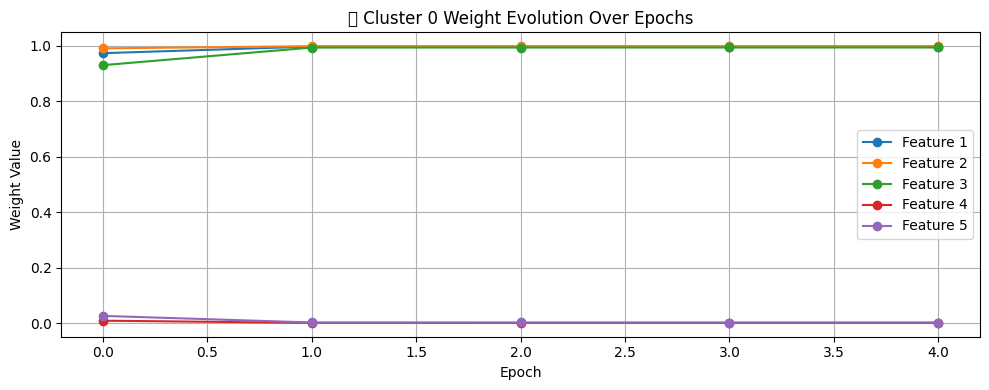

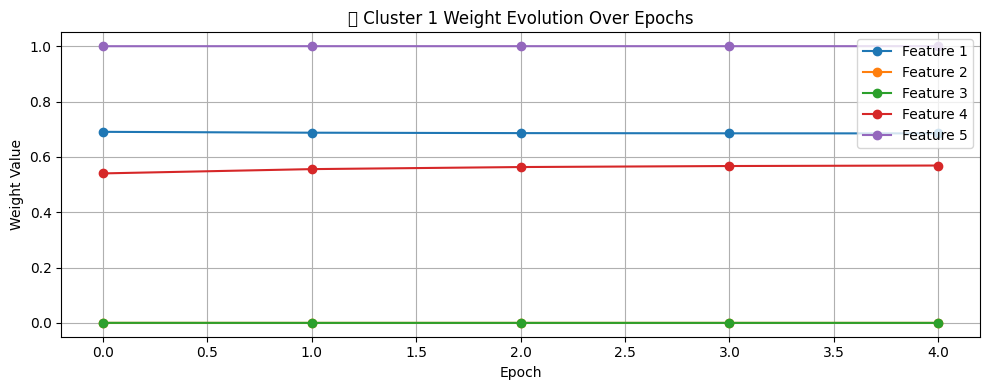

In [16]:
for cluster in range(2):
    plt.figure(figsize=(10, 4))
    for dim in range(features):
        plt.plot(range(epochs), history[:, cluster, dim], marker='o', label=f'Feature {dim+1}')
    plt.title(f'📈 Cluster {cluster} Weight Evolution Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Weight Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()